# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are built by recursively splitting the data based on feature values that result in the best separation of target classes (for classification) or lowest error (for regression). This starts at the root and continues down to leaves, using metrics like Gini impurity or variance reduction to choose splits.

2. Trees can easily model non-linear relationships because they don’t assume any particular mathematical form. They just keep splitting the data into regions with similar outcomes. In contrast, linear models try to fit a straight line or plane to the data, so they struggle with patterns that aren’t linear unless you transform the features.

3. The Gini index measures how “pure” a split is—how mixed the classes are. A low Gini means the node mostly contains one class, which is ideal. It’s fast to compute, works well in practice, and directly supports classification tasks by promoting splits that make the target classes more distinct.

4. Trees overfit because they can keep splitting until every leaf has very few samples, even memorizing noise. To prevent this, we can:
- Limit tree depth
- Set a minimum number of samples per split or leaf
- Prune branches that don’t improve performance
- Use ensembles like Random Forests or Boosting

5. False. While trees handle categorical variables well (especially with one-hot encoding), they also perform strongly on continuous variables. Trees are flexible and work well with both types of features because they split data based on thresholds, not assumptions about data distributions.

6. Binary splits (two branches) make the tree easier to interpret and manage. They also allow a more fine-grained search through the space of possible splits. Allowing more than two splits per node complicates optimization and can lead to larger, less efficient trees.

7. Overfitting signs: Very deep tree, many branches, small leaf sizes, perfect accuracy on training data but poor test performance.
Underfitting signs: Very shallow tree, few splits, low accuracy on both train and test sets.
You can also use cross-validation to check generalization and compare performance metrics.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [1]:
#Question 1
import pandas as pd

df = pd.read_csv('cars_hw.csv')

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (976, 12)
Columns: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed          

In [2]:
#Question 2
from sklearn.model_selection import train_test_split

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

X = df_encoded.drop(columns='Price')
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
#Question 3
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

best_r2 = -1
best_leaf = 1

for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = r2_score(y_test, preds)
    if score > best_r2:
        best_r2 = score
        best_leaf = leaf

print(f"Best min_samples_leaf: {best_leaf}, with R²: {best_r2:.4f}")

Best min_samples_leaf: 8, with R²: 0.8213


Decision Tree R²: 0.8213
Decision Tree RMSE: 143159.09


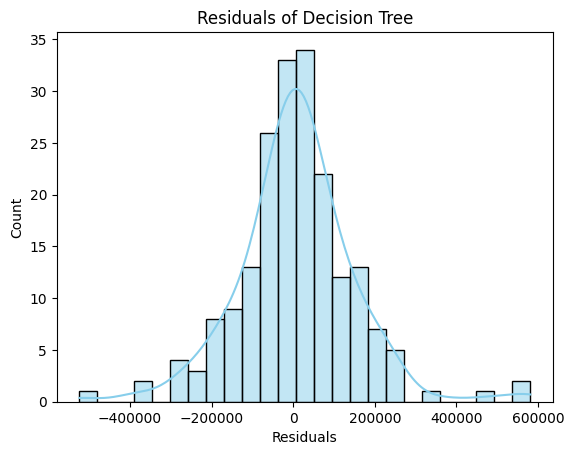

In [5]:
#Question 4
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tree_final = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
tree_final.fit(X_train, y_train)
y_pred_tree = tree_final.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Decision Tree R²: {r2_tree:.4f}")
print(f"Decision Tree RMSE: {rmse_tree:.2f}")

residuals_tree = y_test - y_pred_tree
sns.histplot(residuals_tree, kde=True, color="skyblue")
plt.title("Residuals of Decision Tree")
plt.xlabel("Residuals")
plt.show()


Linear Model R²: 0.8164
Linear Model RMSE: 145117.59


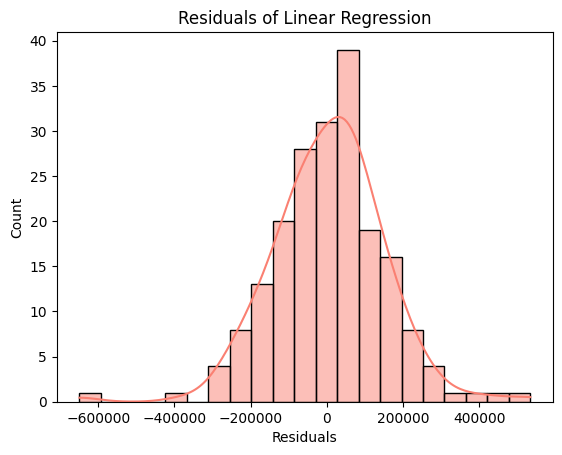

In [7]:
#Question 5
from sklearn.metrics import mean_squared_error, r2_score

r2_lin = r2_score(y_test, y_pred_lin)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

print(f"Linear Model R²: {r2_lin:.4f}")
print(f"Linear Model RMSE: {rmse_lin:.2f}")

residuals_lin = y_test - y_pred_lin
sns.histplot(residuals_lin, kde=True, color="salmon")
plt.title("Residuals of Linear Regression")
plt.xlabel("Residuals")
plt.show()



The regression tree performs slightly better on the test set, with a higher R² and lower RMSE than the linear model. This is because it can capture non-linear relationships and interactions between features, which a linear model cannot.

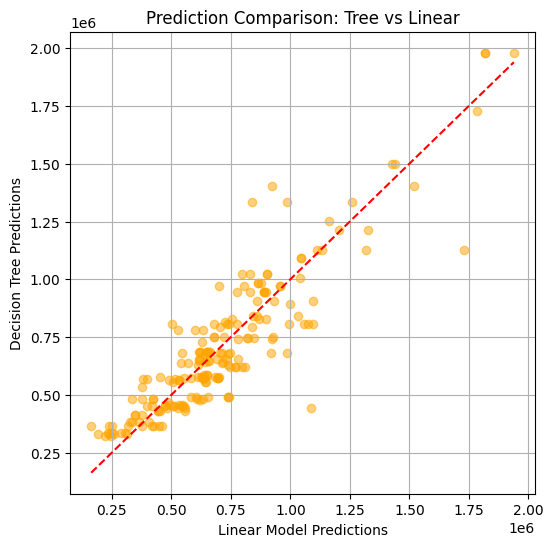

In [8]:
#Question 6
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.5, color='orange')
plt.plot([min(y_pred_lin), max(y_pred_lin)],
         [min(y_pred_lin), max(y_pred_lin)],
         'r--')

plt.xlabel("Linear Model Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Prediction Comparison: Tree vs Linear")
plt.grid(True)
plt.show()


In the scatterplot comparing predictions from the decision tree and the linear model, most points lie close to the diagonal red line, indicating that both models often produce similar predictions. However, some scatter appears, especially for higher-priced cars, suggesting the decision tree adjusts more flexibly to extreme values. This shows that while both models agree on many predictions, the tree may capture nuances the linear model misses.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [9]:
#Question 1
import pandas as pd

df = pd.read_csv('Breast Cancer METABRIC.csv')

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (2509, 34)
Columns: ['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2  

In [10]:
#Question 2
features_numeric = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
features_categorical = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
target_classification = 'Overall Survival Status'
target_regression = 'Overall Survival (Months)'

selected_columns = features_numeric + features_categorical + [target_classification, target_regression]
df_filtered = df[selected_columns].dropna()

df_encoded = pd.get_dummies(df_filtered, columns=features_categorical, drop_first=True)

X = df_encoded.drop(columns=[target_classification, target_regression])
y_class = df_encoded[target_classification]
y_reg = df_encoded[target_regression]

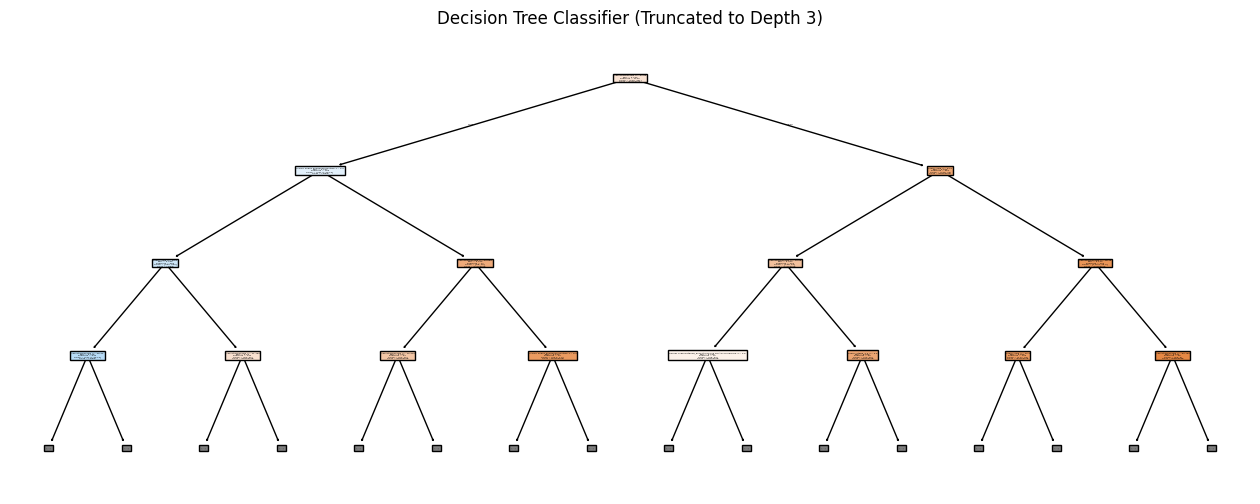

Confusion Matrix:
 [[ 71  48]
 [ 41 120]]
Accuracy: 0.6821428571428572


In [11]:
#Question 3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train_class)
y_pred_class = clf.predict(X_test)

plt.figure(figsize=(16, 6))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, max_depth=3)
plt.title("Decision Tree Classifier (Truncated to Depth 3)")
plt.show()

conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=["Living", "Deceased"])
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

In [12]:
#Question 4
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("Sensitivity (TPR):", TPR)
print("Specificity (TNR):", TNR)

Sensitivity (TPR): 0.7453416149068323
Specificity (TNR): 0.5966386554621849


Best min_samples_leaf: 25
R² (test set): 0.07886617711344746
RMSE (test set): 76.79167452665695


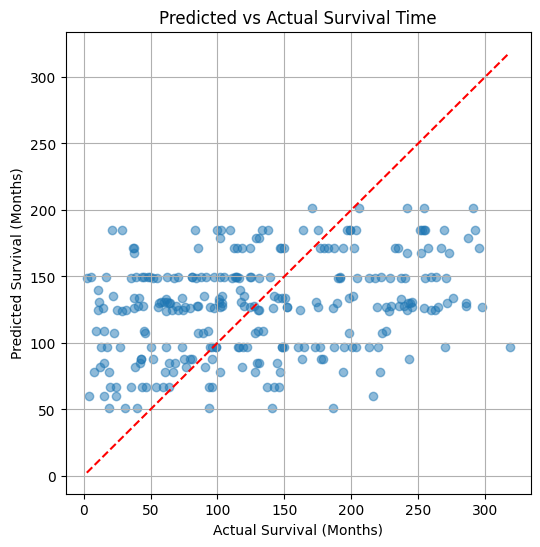

In [13]:
#Question 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

best_r2 = -np.inf
best_leaf = 1

for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train_r, y_train_r)
    preds = model.predict(X_test_r)
    score = r2_score(y_test_r, preds)
    if score > best_r2:
        best_r2 = score
        best_leaf = leaf

final_reg = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_reg.fit(X_train_r, y_train_r)
y_pred_reg = final_reg.predict(X_test_r)

r2_final = r2_score(y_test_r, y_pred_reg)
rmse_final = np.sqrt(mean_squared_error(y_test_r, y_pred_reg))

print("Best min_samples_leaf:", best_leaf)
print("R² (test set):", r2_final)
print("RMSE (test set):", rmse_final)

plt.figure(figsize=(6, 6))
plt.scatter(y_test_r, y_pred_reg, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Predicted vs Actual Survival Time")
plt.grid(True)
plt.show()


The model performs poorly for clinical purposes, with an R² of only 0.079, meaning it explains less than 8% of the variance in patient survival time. The predictions are clustered near the average, failing to capture important individual differences. This lack of precision and reliability makes it unsuitable for clinical decision-making, where accurate survival estimates are critical.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?